In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import itertools
from tensorflow.keras.layers import Dense, Conv2D, Input,Flatten,Dropout
from tensorflow.keras.models import Model

In [2]:
minst=tf.keras.datasets.mnist

In [3]:
(x_train,y_train),(x_test,y_test)=minst.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [4]:
x_train=x_train/255.0
x_test=x_test/255.0
x_train.shape

(60000, 28, 28)

In [5]:
# data is 2D so we need to expand
# CNN needs H*W*C
x_train=np.expand_dims(x_train,-1)
x_train.shape

(60000, 28, 28, 1)

In [6]:
k=len(set(y_train))
k

10

In [7]:
set(y_train)
x_train[0].shape

(28, 28, 1)

In [8]:
# model using functional api
# stride=2 reduces the pixel by half at each iteration
i=Input(x_train[0].shape)
x=Conv2D(32,(3,3),strides=2,activation='relu')(i)
x=Conv2D(64,(3,3),strides=2,activation='relu')(x)
x=Conv2D(128,(3,3),strides=2,activation='relu')(x)
x=Flatten()(x)
x.shape
x=Dropout(0.2)(x)
x=Dense(512,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(k,activation='softmax')(x)

model=Model(i,x)


In [9]:
model.compile(optimizer = 'adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
r=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=15)

Epoch 1/15
1875/1875 [==============================] - 24s 5ms/step - loss: 0.1836 - accuracy: 0.9440 - val_loss: 0.0544 - val_accuracy: 0.9825
Epoch 2/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0679 - accuracy: 0.9789 - val_loss: 0.0558 - val_accuracy: 0.9834
Epoch 3/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0503 - accuracy: 0.9846 - val_loss: 0.0391 - val_accuracy: 0.9879
Epoch 4/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0385 - accuracy: 0.9881 - val_loss: 0.0461 - val_accuracy: 0.9857
Epoch 5/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0316 - accuracy: 0.9895 - val_loss: 0.0462 - val_accuracy: 0.9858
Epoch 6/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0273 - accuracy: 0.9913 - val_loss: 0.0392 - val_accuracy: 0.9883
Epoch 7/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0247 - accuracy: 0.9920 - val_loss: 0.0415 - val_accuracy

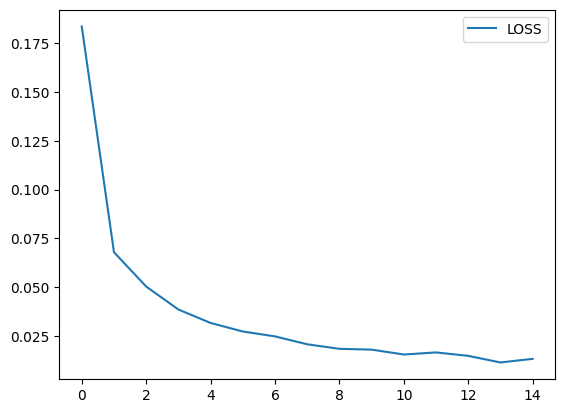

In [10]:
plt.plot(r.history['loss'],label='LOSS')
# plt.plot(r.history['val_loss'],label='VAL_LOSS')
plt.legend()

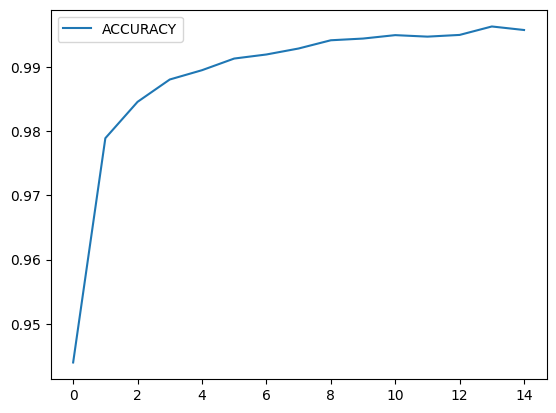

In [11]:
plt.plot(r.history['accuracy'],label='ACCURACY')
# plt.plot(r.history['val_accuracy'],label='VAL_ACCURACY')
plt.legend()

In [12]:
eval=model.evaluate(x_test,y_test)
print("Accuracy : ", eval[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0590 - accuracy: 0.9882
Accuracy :  0.9882000088691711


In [16]:
from sklearn.metrics import confusion_matrix
p_test=model.predict(x_test).argmax(axis=1)
cm=confusion_matrix(y_test,p_test)
print(cm)

313/313 [==============================] - 2s 5ms/step
[[ 970    0    1    0    0    0    5    2    0    2]
 [   0 1128    1    2    0    0    1    2    0    1]
 [   0    0 1020    2    1    0    1    5    3    0]
 [   0    0    2 1005    0    1    0    1    1    0]
 [   0    0    0    0  965    0    2    1    1   13]
 [   0    0    0   13    0  873    3    1    1    1]
 [   3    1    0    0    1    1  951    0    1    0]
 [   0    1    7    3    0    0    0 1015    1    1]
 [   0    0    2    2    0    0    1    0  966    3]
 [   0    0    0    2    9    4    1    2    2  989]]


313/313 [==============================] - 1s 2ms/step
[[ 970    0    1    0    0    0    5    2    0    2]
 [   0 1128    1    2    0    0    1    2    0    1]
 [   0    0 1020    2    1    0    1    5    3    0]
 [   0    0    2 1005    0    1    0    1    1    0]
 [   0    0    0    0  965    0    2    1    1   13]
 [   0    0    0   13    0  873    3    1    1    1]
 [   3    1    0    0    1    1  951    0    1    0]
 [   0    1    7    3    0    0    0 1015    1    1]
 [   0    0    2    2    0    0    1    0  966    3]
 [   0    0    0    2    9    4    1    2    2  989]]


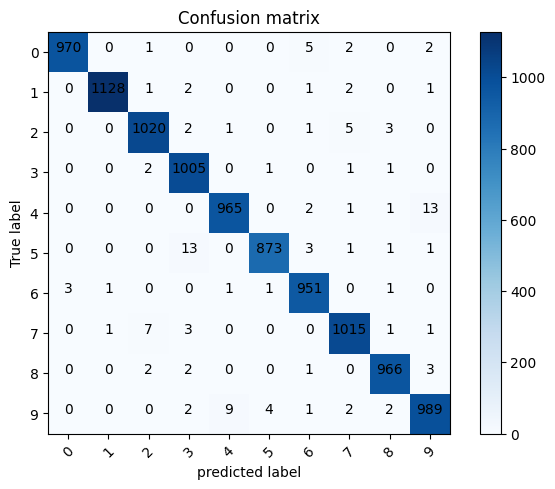

In [13]:
# from sklearn.metrics import confusion_matrix
# def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
#   if normalize:
#     cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
  

#   plt.imshow(cm,interpolation='nearest',cmap=cmap)
#   plt.title(title)
#   plt.colorbar()
#   tick_marks=np.arange(len(classes))
#   plt.xticks(tick_marks,classes,rotation=45)
#   plt.yticks(tick_marks,classes)

#   fmt='.2f' if normalize else 'd'
#   thresh=cm.max()/.2
#   for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
#     plt.text(j,i,format(cm[i,j],fmt),
#              ha="center",
#              color='white' if cm[i,j]> thresh else 'black')

#   plt.tight_layout()
#   plt.ylabel('True label')
#   plt.xlabel('predicted label')
#   plt.show

# p_test=model.predict(x_test).argmax(axis=1)
# cm=confusion_matrix(y_test,p_test)
# print(cm)
# plot_confusion_matrix(cm,list(range(10)))

In [14]:
label='''T-shirt/top
 Trouser
 Pullover
 Dress
 Coat
 Sandal
 Shirt
 Sneaker
 Bag
 Ankle boot'''.split()
label

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle',
 'boot']

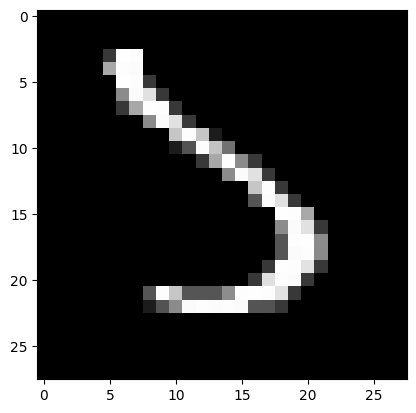

In [15]:
misclassified_idx=np.where(p_test!=y_test)[0]
# np.where()returns a tuple so choosing [0] selects the array
i=np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28),cmap='gray')
# plt.title('True label: %s %s Predicted: %s %s '%(y_test[i],label[y_test[i]],p_test[i],label[p_test[i]]))